# Introduction and Dataset Description
Since this is an introductory article, the problem that we are going to solve is pretty simple. Suppose we have some information about obesity, smoking habits, and exercise habits of five people. We also know whether these people are diabetic or not. Our dataset looks like this.

In [ ]:
est

In [ ]:
import pandas as pd
import numpy as np

!gdown --id -q 1EJmU7Mli1oXLPJfXGrus0HHfVnXM6wpk
!unzip -q Data.zip

data = pd.read_csv('Data.csv')
data.head()

,Person,Smoking,Obesity,Exercise,Diabetic
0,Person 1,0,1,0,1
1,Person 2,0,0,1,0
2,Person 3,1,0,0,0
3,Person 4,1,1,0,1
4,Person 5,1,1,1,1


In the above table, we have five columns: Person, Smoking, Obesity, Exercise, and Diabetic. Here 1 refers to true and 0 refers to false. For instance, the first person has values of 0, 1, 0 which means that the person doesn't smoke, is obese, and doesn't exercise. The person is also diabetic.

It is clearly evident from the dataset that a person's obesity is indicative of him being diabetic. Our task is to create a neural network that is able to predict whether an unknown person is diabetic or not from the given data about his exercise habits, obesity, and smoking habits. This is a type of supervised learning problem where we are given inputs and corresponding correct outputs and our task is to find the mapping between the inputs and the outputs.

**Note**: This is just a fictional dataset, in real life, obese people are not necessarily always diabetic.

# The Solution
We will create a very simple neural network with one input layer, one hidden layer (that will contain two hidden units) and one output layer. Before writing any actual code, let's first let's see how our neural network will execute, in theory. For simplicity, we are not considering the bias term.<br>
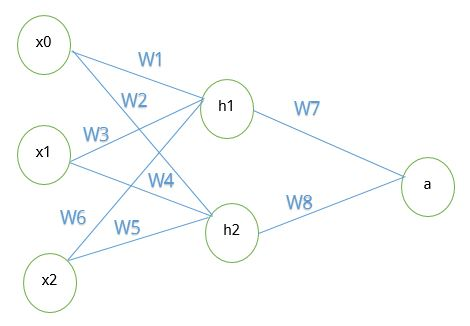



### Separating feature values from labels

In [ ]:
data_np = data.to_numpy()
X = data_np[:,[1,2,3]]
y = data_np[:,4]
y = np.atleast_2d(y).T

print(f'X:\n {X}')
print(f'y:\n {y}')

X:
 [[0 1 0]
 [0 0 1]
 [1 0 0]
 [1 1 0]
 [1 1 1]]
y:
 [[1]
 [0]
 [0]
 [1]
 [1]]


### Weight Initialization
At first, we will consider random weights. We will store the weights values for input layer and hidden layer in matrix `w1`. Weight values for hidden layer and output layer will be stored in matrix `w2`.<br>
Since, there are 3 input units and 2 hidden units, the dimension of matrix `w1` will be 3 × 2. For the same reason, dimension of matrix `w2` will be 2 × 1.

In [ ]:
number_of_neurons_in_input_layer = len(X[0])
number_of_neurons_in_hidden_layer = 2
number_of_neurons_in_output_layer = 1

w1 = np.random.random((number_of_neurons_in_input_layer, number_of_neurons_in_hidden_layer))
w2 = np.random.random((number_of_neurons_in_hidden_layer, number_of_neurons_in_output_layer))

print(f'w1:\n {w1}')
print(f'w2:\n {w2}')

w1:
 [[0.23666368 0.76642668]
 [0.90267111 0.1719453 ]
 [0.53160396 0.60352853]]
w2:
 [[0.26824902]
 [0.16316142]]


## Forward Propagation
At first, we will calculate the weighted sum by multiplying `X` with `w1`. Let this result be $z_{h}$.<br>
$$z_h = \sum_{i=1}^{X} x_iw_{1_i}$$

In [ ]:
z_h=np.matmul(X,w1)
print(f'z_h:\n {z_h}')

z_h:
 [[0.9026711102642083 0.17194530280490283]
 [0.5316039595187925 0.6035285268568544]
 [0.2366636800652585 0.7664266780156214]
 [1.1393347903294668 0.9383719808205242]
 [1.6709387498482593 1.5419005076773786]]


$z_{h}$ is the value of hidden layer. To keep this value between 0 and 1, we will pass it through a `sigmoid` function and calculate `a_h`.<br>
$$sigmoid = \frac{1}{1+_e{-x}}$$

In [ ]:
def sigmoid(x):
    return (1/(1+np.exp(-x.astype(float))))

In [ ]:
a_h = sigmoid(z_h)
print(f'a_h:\n {a_h}')

a_h:
 [[0.71149811 0.54288073]
 [0.62985713 0.64646316]
 [0.5588913  0.68274741]
 [0.75755748 0.71877069]
 [0.84170094 0.82374083]]


Now we'll calculate the value of output layer by multiplying the value of hidden layer `a_h` with `w2`. Then, we'll pass the resultant value through a sigmoid function which in turn will return us the final value `a_o`.<br>
$$z_o = \sum_{i=1}^{} a_{h_i}w_{2_i}$$<br>
$$a_o = sigmoid(z_o)$$


In [ ]:
z_o=np.matmul(a_h,w2)
a_o=sigmoid(z_o)
print(f'a_o:\n {a_o}')

a_o:
 [[0.56940791]
 [0.56818171]
 [0.56496077]
 [0.57944359]
 [0.58908599]]


But, this is not our final output. We'll calculate the `error` from the difference between our ground truth `y` and `a_o`.<br>
$$error, E_{a_o} = \frac{1}{2} (a_o-y)^2$$

In [ ]:
error = (0.5*(np.power((a_o-y),2)))
print(f'error:\n {error}')

error:
 [[0.09270477280929054]
 [0.16141522819787554]
 [0.15959033552001528]
 [0.08843384640384774]
 [0.08442516341250714]]


## Back Propagation

### Updating `w2`
Back Propagation will start now. This means that in order to minimize the error that we have received, we will repeatedly update the weights of the `w1` and `w2` matrix back from the output layer and calculate the error. In this way we can reduce the error a lot at a time and predict the value which will be closer to the actual output.<br>

So first we will find out how much change in the weights of `w2` will reduce our error. We will deduct the value of $\frac {dE_{a_o}}{dw_2}$ from $w_2$.<br>
$$w_2 = w_2 - learningRate×\frac{dEa_o}{dw_2}$$.<br>
From the chain rule of calculus, we can calculate the value of $\frac {dE_{a_o}}{dw_2}$ as follows,<br>

$$\frac {dE_{a_o}}{dw_2} = \frac {dE_{a_o}}{dz_o} × \frac {d_{z_o}}{dw_2}$$<br>
$$\frac {dE_{a_o}}{dw_2} = \frac {dE_{a_o}}{da_o} × \frac {d{a_o}}{dz_o} × \frac {d_{z_o}}{dw_2}$$<br>
$$\frac {dE_{a_o}}{da_o} = \frac{d}{da_o}(\frac{1}{2} (a_o-y)^2)=a_o-y$$<br>


In [ ]:
dEdao = a_o-y
print(f'dEdao:\n {dEdao}')

dEdao:
 [[-0.430592087268892]
 [0.5681817107191599]
 [0.564960769469908]
 [-0.42055640859187426]
 [-0.41091401390682003]]


Now, the second therm which is needed to calculate $\frac {dE_{a_o}}{dw_2}$ is basically the derivative of the `sigmoid` function.<br>
$\frac{da_o}{dz_o} = \frac{d}{dz_o}(\frac{1}{1+_e{-z_o}})$<br>
$\frac{da_o}{dz_o} = \frac{d}{dz_o}({1+_e{-z_o}})^{-1}$<br>
$\frac{da_o}{dz_o} = (-1)({1+_e{-z_o}})^{-2}(-e^{-z_o})$<br>
....<br>....<br>
$\frac{da_o}{dz_o} =\frac{1}{1+_e{-z_o}}×(1-\frac{1}{1+_e{-z_o}}) = sigmoid(z_o)×(1-sigmoid(z_o))=a_o×(1-a_o)$

In [ ]:
def sigmoid_derivative(x):
    return x*(1-x)
daozo = sigmoid_derivative(a_o)
print(f'daozo:\n {daozo}')

daozo:
 [[0.24518254]
 [0.24535125]
 [0.2457801 ]
 [0.24368872]
 [0.24206369]]


The last term,<br>
$$\frac{dz_o}{dw_2} = \frac{d}{dw_2}(a_h×w_2) = a_h$$<br>
Now, we have all the necessary information to calculate $\frac {dE_{a_o}}{dw_2}$

In [ ]:
dEdw2 = np.matmul(a_h.T, (dEdao*daozo))
print(f'dEdw2:\n {dEdw2}')

dEdw2:
 [[-0.0710652606219097]
 [-0.02798907722284588]]


Now, we'll update the weight values of `w2` by subtracting $\frac{dEa_o}{dw_2}$ from `w2`. But, for faster convergence, we'll multiply $\frac{dEa_o}{dw_2}$ by `learning_rate = 3`.

In [ ]:
learning_rate = 3
w2 = w2 - learning_rate*dEdw2
print(f'w2:\n {w2}')

w2:
 [[0.48144480452866745]
 [0.24712865175099102]]


### Updating `w1`
Now we will go one more step backward. The updated value of `w1` will be, $$w_1 = w_1 - learningRate×\frac{dEa_o}{dw_1}$$.<br>
Now, using chain rule as before, we will calculate the value of $\frac{dEa_o}{dw_1}$.<br>


$$\frac{dEa_o}{dw_1} = \frac{dEa_o}{dz_h}×\frac{dz_h}{dw_1}$$
$$\frac{dEa_o}{dw_1} = \frac{dEa_o}{da_h}×\frac{da_h}{dz_h}×\frac{dz_h}{dw_1}$$
Since, there is no direct relationship between $dEa_o$ and $da_h$, we have to break them again using chain rule as follows.
$$\frac{dEa_o}{da_h} = \frac{dEa_o}{dz_o}×\frac{dz_o}{da_h} = \frac{dEa_o}{da_o}×\frac{da_o}{dz_o}×\frac{dz_o}{da_h}$$
But, we have already calculated the value of $\frac{dEa_o}{da_o}×\frac{da_o}{dz_o}$ while updating `w2`. So,
$$\frac{dz_o}{da_h} = \frac{d}{da_h}(a_h×w_2) = w_2$$

In [ ]:
dEdzo = dEdao*daozo
dEdah = np.matmul(dEdzo, w2.T)
print(f'dEdah:\n {dEdah}')

dEdah:
 [[-0.05082789124362949 -0.026090276842184134]
 [0.0671153774644728 0.03445074614688545]
 [0.06685155443574033 0.03431532412388668]
 [-0.04934079911681347 -0.0253269430833136]
 [-0.047888044308369 -0.024581234886322818]]


We have successfully calculated the value of $\frac{dEa_o}{da_h}$. As it is the derivative of sigmoid, $$\frac{da_h}{dz_h} = a_h\times(1-a_h)$$

In [ ]:
dahdzh = sigmoid_derivative(a_h)
print(f'dahdzh:\n {dahdzh}')

dahdzh:
 [[0.20526855 0.24816124]
 [0.23313713 0.22854854]
 [0.24653181 0.21660339]
 [0.18366414 0.20213939]
 [0.13324047 0.14519187]]


Now, for the last term to calculate $\frac{dEa_o}{dw_1}$,$$\frac{dz_h}{dw_1} = \frac{d}{dw_1}(X×w_1) = X$$

In [ ]:
dEdw1 = np.matmul(X.T, dEdah*dahdzh)
print(f'dEdw1:\n {dEdw1}')

dEdw1:
 [[0.0010382740867878734 -0.001255752874946575]
 [-0.025876128498090754 -0.015163163789912079]
 [0.009266460766404534 0.0043046722779739]]


Now, we'll update the weight values of `w1` by subtracting $\frac{dEa_o}{dw_1}$ from `w1`.

In [ ]:
w1 = w1-learning_rate*dEdw1
print(f'w1:\n {w1}')

w1:
 [[0.2335488578048949 0.7701939366404611]
 [0.9802994957584805 0.21743479417463907]
 [0.5038045772195788 0.5906145100229327]]


# Prediction

In [ ]:
def predict(X,w1,w2):
    return sigmoid(np.matmul(sigmoid(np.matmul(X,w1)),w2))

In [ ]:
prediction = predict(X, w1,w2)

print(f'prediction probabilities:\n {prediction}')
print(f'prediction:\n {np.round(prediction)}')

prediction probabilities:
 [[0.61940802]
 [0.61280987]
 [0.607695  ]
 [0.63442477]
 [0.64863401]]
prediction:
 [[1.]
 [1.]
 [1.]
 [1.]
 [1.]]


# Training
Let's run for 500 epochs and check whether the loss decreases or not. In the mean time, the prediction should get better.

In [ ]:
data_np = data.to_numpy()
X = data_np[:,[1,2,3]]
y = data_np[:,4]
y = np.atleast_2d(y).T

w1 = np.random.random((3,2))
w2 = np.random.random((2,1))

epochs = 50
learning_rate = 3

for i in range(0, epochs):
    z_h=np.matmul(X,w1)
    a_h = sigmoid(z_h)
    z_o=np.matmul(a_h,w2)
    a_o=sigmoid(z_o)
    error = (0.5*(np.power((a_o-y),2)))
    print(f'error in epoch {i+1}: {np.sum(error)}')


    dEdao = a_o-y
    daozo = sigmoid_derivative(a_o)
    dEdw2 = np.matmul(a_h.T, (dEdao*daozo))
    learning_rate = 3
    w2 = w2 - learning_rate*dEdw2

    dEdzo = dEdao*daozo
    dEdah = np.matmul(dEdzo, w2.T)
    dahdzh = sigmoid_derivative(a_h)
    dEdw1 = np.matmul(X.T, dEdah*dahdzh)
    w1 = w1-learning_rate*dEdw1

prediction = predict(X, w1, w2)

print(f'prediction probabilities:\n {prediction}')
print(f'prediction:\n {np.round(prediction)}')

error in epoch 1: 0.5797383466220697
error in epoch 2: 0.5707010229538079
error in epoch 3: 0.5647613598237415
error in epoch 4: 0.5583721490095633
error in epoch 5: 0.5511495042928337
error in epoch 6: 0.5429051666102428
error in epoch 7: 0.5333965253599031
error in epoch 8: 0.5223315466905648
error in epoch 9: 0.5093801300106651
error in epoch 10: 0.49419112023329115
error in epoch 11: 0.4764221052141663
error in epoch 12: 0.45578624709638255
error in epoch 13: 0.43211608768422805
error in epoch 14: 0.405436218500684
error in epoch 15: 0.3760256365892017
error in epoch 16: 0.3444430552819851
error in epoch 17: 0.3114951635342913
error in epoch 18: 0.2781521628112898
error in epoch 19: 0.2454398660007863
error in epoch 20: 0.21433743526913726
error in epoch 21: 0.185684906235823
error in epoch 22: 0.1600911321103385
error in epoch 23: 0.1378582604600843
error in epoch 24: 0.11896898986671359
error in epoch 25: 0.10315691327018425
error in epoch 26: 0.0900207834342045
error in epoch 27

### Tasks
1. Implement a neural network model to categorize three species of Iris. The dataset can be found [here](https://www.kaggle.com/uciml/iris). Your neural network model should contain **two** hidden layers with as many neurons as you want. For this task, use of any libraries other than `numpy` and `pandas` is prohibited. Your training, validation and test set should have a ratio of 60:20:20. Finally, show the `accuracy` score along with two graphs - training & validation accuracy vs epoch, training & validation loss vs epoch.

1. Implement a neural network model to categorize three species of Iris using **Keras** library from python. The dataset can be found [here](https://www.kaggle.com/uciml/iris). Your neural network model should contain **two** hidden layers with as many neurons as you want. For this task, use of any library is permissible. Your training, validation and test set should have a ratio of 60:20:20. Finally, show the `accuracy` score along with two graphs - training & validation accuracy vs epoch, training & validation loss vs epoch. This [link](https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/) might help you implementing a neural network with **Keras**.

1. For the task `2`, experiment with different number of hidden layers (*2, 4, 6*) to increase the accuracy score. Also show the effect of followings on overall performance: **different activation function (*relu, sigmoid, tanh*) for layers**, **different optimizers (*Adam, Adagrad, Adadelta*)**, and **various learning rates (*1, 0.1, 0.01*)**.
<br>
<br>
*N.B.: Any additional experiment (such as, Early Stopping) with justification or training insights will contain bonus points.*
    

### Solution: Task - 1

In [ ]:
# Codes for Task 1
!unzip -q archive.zip


replace Iris.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
df=pd.read_csv("Iris.csv")
df.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
df["Species"].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [ ]:
df.drop("Id",axis=1,inplace=True)

In [ ]:
df["Iris-virginica"]=df['Species'].apply(lambda x: 1 if x=="Iris-virginica" else 0)
df["Iris-versicolor"]=df['Species'].apply(lambda x: 1 if x=="Iris-versicolor" else 0)
df["Iris-setosa"]=df['Species'].apply(lambda x: 1 if x=="Iris-setosa" else 0)
df.drop("Species",axis=1,inplace=True)



In [ ]:
X=df.iloc[:,:4]
Y=df.iloc[:,4:]

In [ ]:
Y.tail()

,Iris-virginica,Iris-versicolor,Iris-setosa
145,1,0,0
146,1,0,0
147,1,0,0
148,1,0,0
149,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train,X_validation,Y_train,Y_validation=train_test_split(X_train,Y_train,test_size=0.2,random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_validation.shape)

(96, 4)
(30, 4)
(24, 4)


In [ ]:
Y_test.head()

,Iris-virginica,Iris-versicolor,Iris-setosa
73,0,1,0
18,0,0,1
118,1,0,0
78,0,1,0
76,0,1,0


### Solution: Task - 2

In [ ]:
# Codes for Task 2

import tensorflow as ten_f
import tensorflow.keras as keras
mod = keras.models.Sequential([
keras.layers.InputLayer(input_shape=4, dtype='float64'),
keras.layers.Dense(10, activation="relu"),
keras.layers.Dense(5, activation="relu"),
keras.layers.Dense(3, activation="softmax")                 
])
mod.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                50        
                                                                 
 dense_7 (Dense)             (None, 5)                 55        
                                                                 
 dense_8 (Dense)             (None, 3)                 18        
                                                                 
Total params: 123
Trainable params: 123
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from sklearn.utils import validation
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
mod.compile(loss='binary_crossentropy',optimizer="adam",metrics=['accuracy'])
history=mod.fit(X_train,Y_train, epochs=300, batch_size=7,validation_data=(X_validation,Y_validation),callbacks=[early_stopping_cb])
_, accuracy = mod.evaluate(X, Y)
print('Accuracy: %2f' %(accuracy*100))

Epoch 1/300
14/14 [==============================] - 2s 24ms/step - loss: 0.2917 - accuracy: 0.7396 - val_loss: 0.3459 - val_accuracy: 0.6250
Epoch 2/300
14/14 [==============================] - 0s 7ms/step - loss: 0.2889 - accuracy: 0.7708 - val_loss: 0.3423 - val_accuracy: 0.6250
Epoch 3/300
14/14 [==============================] - 0s 9ms/step - loss: 0.2856 - accuracy: 0.7812 - val_loss: 0.3386 - val_accuracy: 0.6667
Epoch 4/300
14/14 [==============================] - 0s 12ms/step - loss: 0.2830 - accuracy: 0.8125 - val_loss: 0.3345 - val_accuracy: 0.6667
Epoch 5/300
14/14 [==============================] - 0s 10ms/step - loss: 0.2804 - accuracy: 0.8125 - val_loss: 0.3338 - val_accuracy: 0.6667
Epoch 6/300
14/14 [==============================] - 0s 7ms/step - loss: 0.2782 - accuracy: 0.8125 - val_loss: 0.3311 - val_accuracy: 0.6667
Epoch 7/300
14/14 [==============================] - 0s 8ms/step - loss: 0.2760 - accuracy: 0.8542 - val_loss: 0.3270 - val_accuracy: 0.7083
Epoch 8/30

In [ ]:
mod.evaluate(X_test.to_numpy(),Y_test.to_numpy())

1/1 [==============================] - 0s 18ms/step - loss: 0.0732 - accuracy: 1.0000


[0.07318907231092453, 1.0]

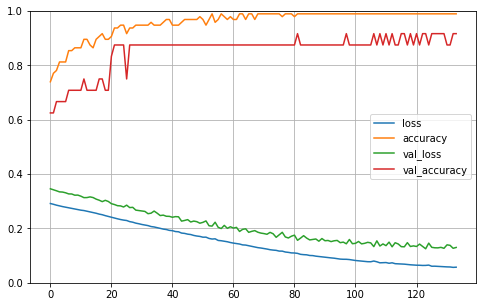

In [ ]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

### Solution: Task - 3

In [ ]:
# Codes for Task 3